In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [33]:
item_data = pd.read_excel('Item_data.xlsx')

In [34]:
sold_pcs = item_data.groupby(pd.Grouper(key='Data wystawienia', axis = 0, freq ='M')).sum()['Rozchód']
mean_price =item_data.groupby(pd.Grouper(key='Data wystawienia', axis = 0, freq ='M')).median()['Cena netto']
customers_no = item_data.groupby(pd.Grouper(key='Data wystawienia', axis = 0, freq ='M')).count()['Kontrahent']

stock = item_data.groupby(pd.Grouper(key='Data wystawienia', axis = 0, freq ='M')).max()['Narastająco']
#zamiast NaN (brak sprzedaży w danym miesiącu) wstawiam wartość z poprzedniego miesiąca żeby zachować ciągłość
for number in range(len(stock)):
    if np.isnan(stock[number])==True:
        stock[number] = stock[number-1]
stock_safe_level = int(sold_pcs.sum()/len(sold_pcs)*4) #5 months average

months = 24

sold_pcs_ranged = sold_pcs[len(sold_pcs)-months:len(sold_pcs)]
mean_price_ranged = mean_price[len(mean_price)-months:len(mean_price)]
customers_no_ranged = customers_no[len(customers_no)-months:len(customers_no)]

stock_ranged = stock[len(stock)-months:len(stock)]
#żeby pozbyć się NaN, kiedy w danym miesiący nie było ruchu towaru
for number in range(len(stock_ranged)):
    if np.isnan(stock_ranged[number])==True:
        stock_ranged[number] = stock_ranged[number-1]

stock_safe_level_ranged = int(sold_pcs_ranged.sum()/len(sold_pcs_ranged)*4) #4 months average

1785


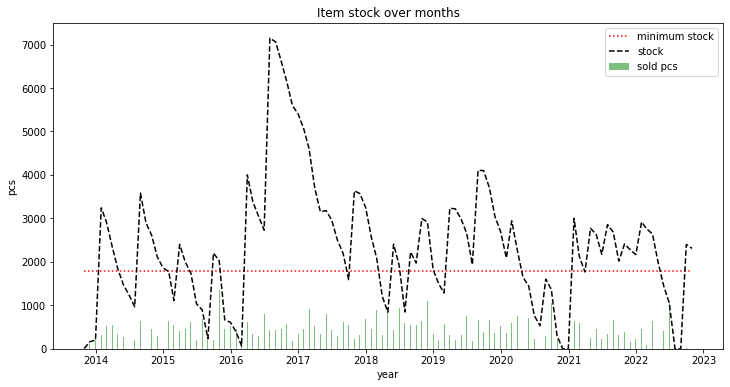

In [45]:
#whole range; stock with '--', sales with bars
print(stock_safe_level)
ax = plt.figure(figsize=(12,6)).add_subplot(1,1,1)
ax.bar(sold_pcs.index,sold_pcs, width =5, color = 'g', alpha = 0.5, label ='sold pcs')
ax.plot(stock.index,[stock_safe_level]*len(stock),'k:', color = 'red', label = 'minimum stock')
ax.plot(stock, 'k--', label = 'stock')
if len(sold_pcs) <=24:
    for enum,pieces in enumerate(sold_pcs):
        ax.text(sold_pcs.index[enum],pieces, (customers_no[enum],round(mean_price[enum],2)) ,color='blue', fontsize='14')
ax.legend()
plt.xlabel('year')
plt.ylabel('pcs')
plt.title('Item stock over months')
plt.savefig('Full_history.jpg')

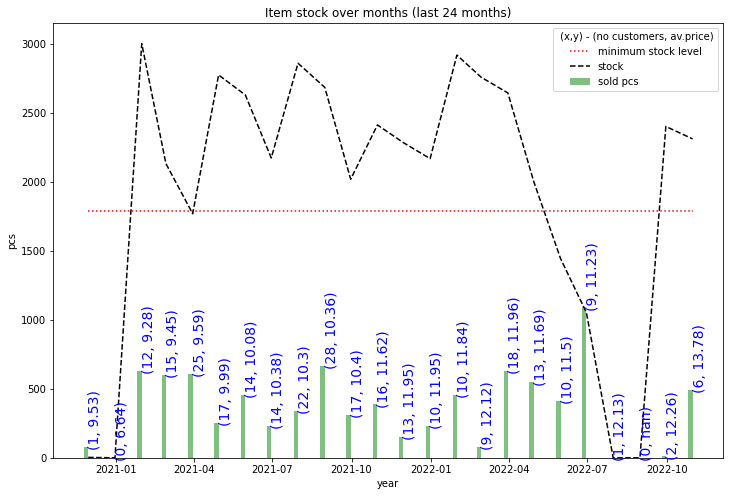

In [46]:
#limited range 2 years
ax = plt.figure(figsize=(12,8)).add_subplot(1,1,1)
ax.bar(sold_pcs_ranged.index, sold_pcs_ranged, width =-5, color = 'g', alpha = 0.5, align = 'edge', label = 'sold pcs')
ax.plot(stock_ranged.index,[stock_safe_level]*len(stock_ranged),'k:', color = 'red', label = 'minimum stock level')
ax.plot(stock_ranged, 'k--', label ='stock')
if len(sold_pcs_ranged) <=24:
    for enum,pieces in enumerate(sold_pcs_ranged):
        ax.text(sold_pcs_ranged.index[enum],pieces, (customers_no_ranged[enum],round(mean_price_ranged[enum],2)),\
        color='blue', fontsize='14', rotation = 'vertical')
ax.legend(title =' (x,y) - (no customers, av.price)')
plt.xlabel('year')
plt.ylabel('pcs')
plt.title('Item stock over months (last 24 months)')
plt.savefig('Ranged_history.jpg')